# Gamma Telescope


<img src="https://news.uns.purdue.edu/images/+2004/finley-veritas.jpg">


The data are MC generated to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique.A neural algorithm was developed to separate electromagnetic and hadronic showers detected with an air shower array. The requirements on the detector performance are very general, so that the results of the calculation can be applied to a wide set of detectors, actually operating or planned for the future. More then 700 000 showers were generated using the Corsika package and were propagated through an ideal pixel-like detector.

### Problem

Classification can be done on current present Dataset which can be further used on newer readings by Cherenkov gamma telescope.

### Import needed libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#### Now we import our dataset and try and understand it

In [3]:
data = pd.read_csv("gamma.csv",names=[ 'fLength','fWidth','fSize' ,'fConc' ,'fConc1','fAsym' ,'fM3Long','fM3Trans' ,'fAlpha' ,'fDist','class'])
data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
data.describe(include="all")

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,g
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12332
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026,NaN
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787,NaN
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,NaN
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250,NaN
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450,NaN
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825,NaN


#### We check for any null/missing values in our Dataset

In [5]:
data.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

## Performing EDA

EDA or Exploratory Data Analysis is the process of gathering useful informations and insights from data. EDA helps us in a better understanding of the data and the trends it follows.

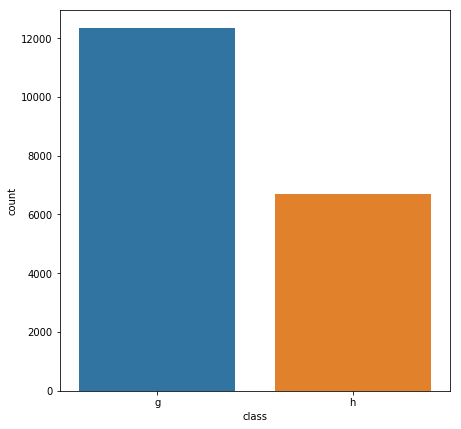

In [6]:
plt.figure(figsize=(7,7))
sns.countplot(data['class'])
plt.show()

#### Here the count plot helps us to visualize the count of any data

We were given the exact count of 'g' and 'h' in our problemset:
    Number of g = gamma (signal): 12332 
    Number of h = hadron (background): 6688
    
This can be seen in the count plot and we can say that the given numbers of 'g' and 'h' match our dataset.

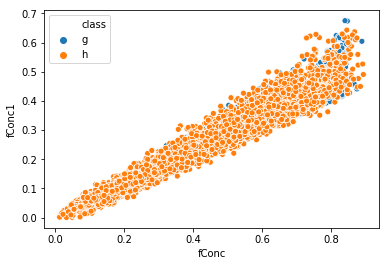

In [7]:
sns.scatterplot(data=data,x='fConc',y='fConc1',hue='class')
plt.show()

### We are doing some bi-variate analysis to find if we have some corelation in our data or not

The corelation being high means that both the data columns we use are similar to each other, so we can say that high correlation in data can be seen as data redundancy.

Above seeing the scatterplot between 'fConc' and 'fConc1', we can see that these 2 are highly co-related.

We check it for some other datacolumns too.

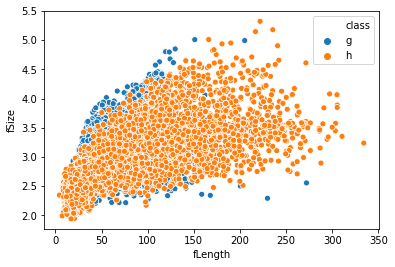

In [8]:
sns.scatterplot(data=data,x='fLength',y='fSize',hue='class')
plt.show()

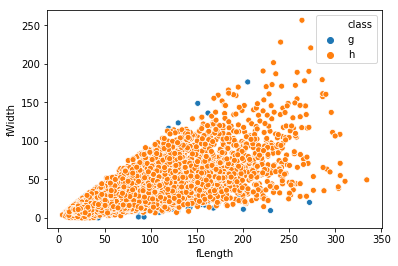

In [9]:
sns.scatterplot(data=data,x='fLength',y='fWidth',hue='class')
plt.show()

### The above 2 figures also show some kind of co-relation between them so we go ahead and check out the values of their co-relation

## Now we go ahead and do multi-variate analysis
We start with pairplot on our data. Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

<Figure size 1224x1224 with 0 Axes>

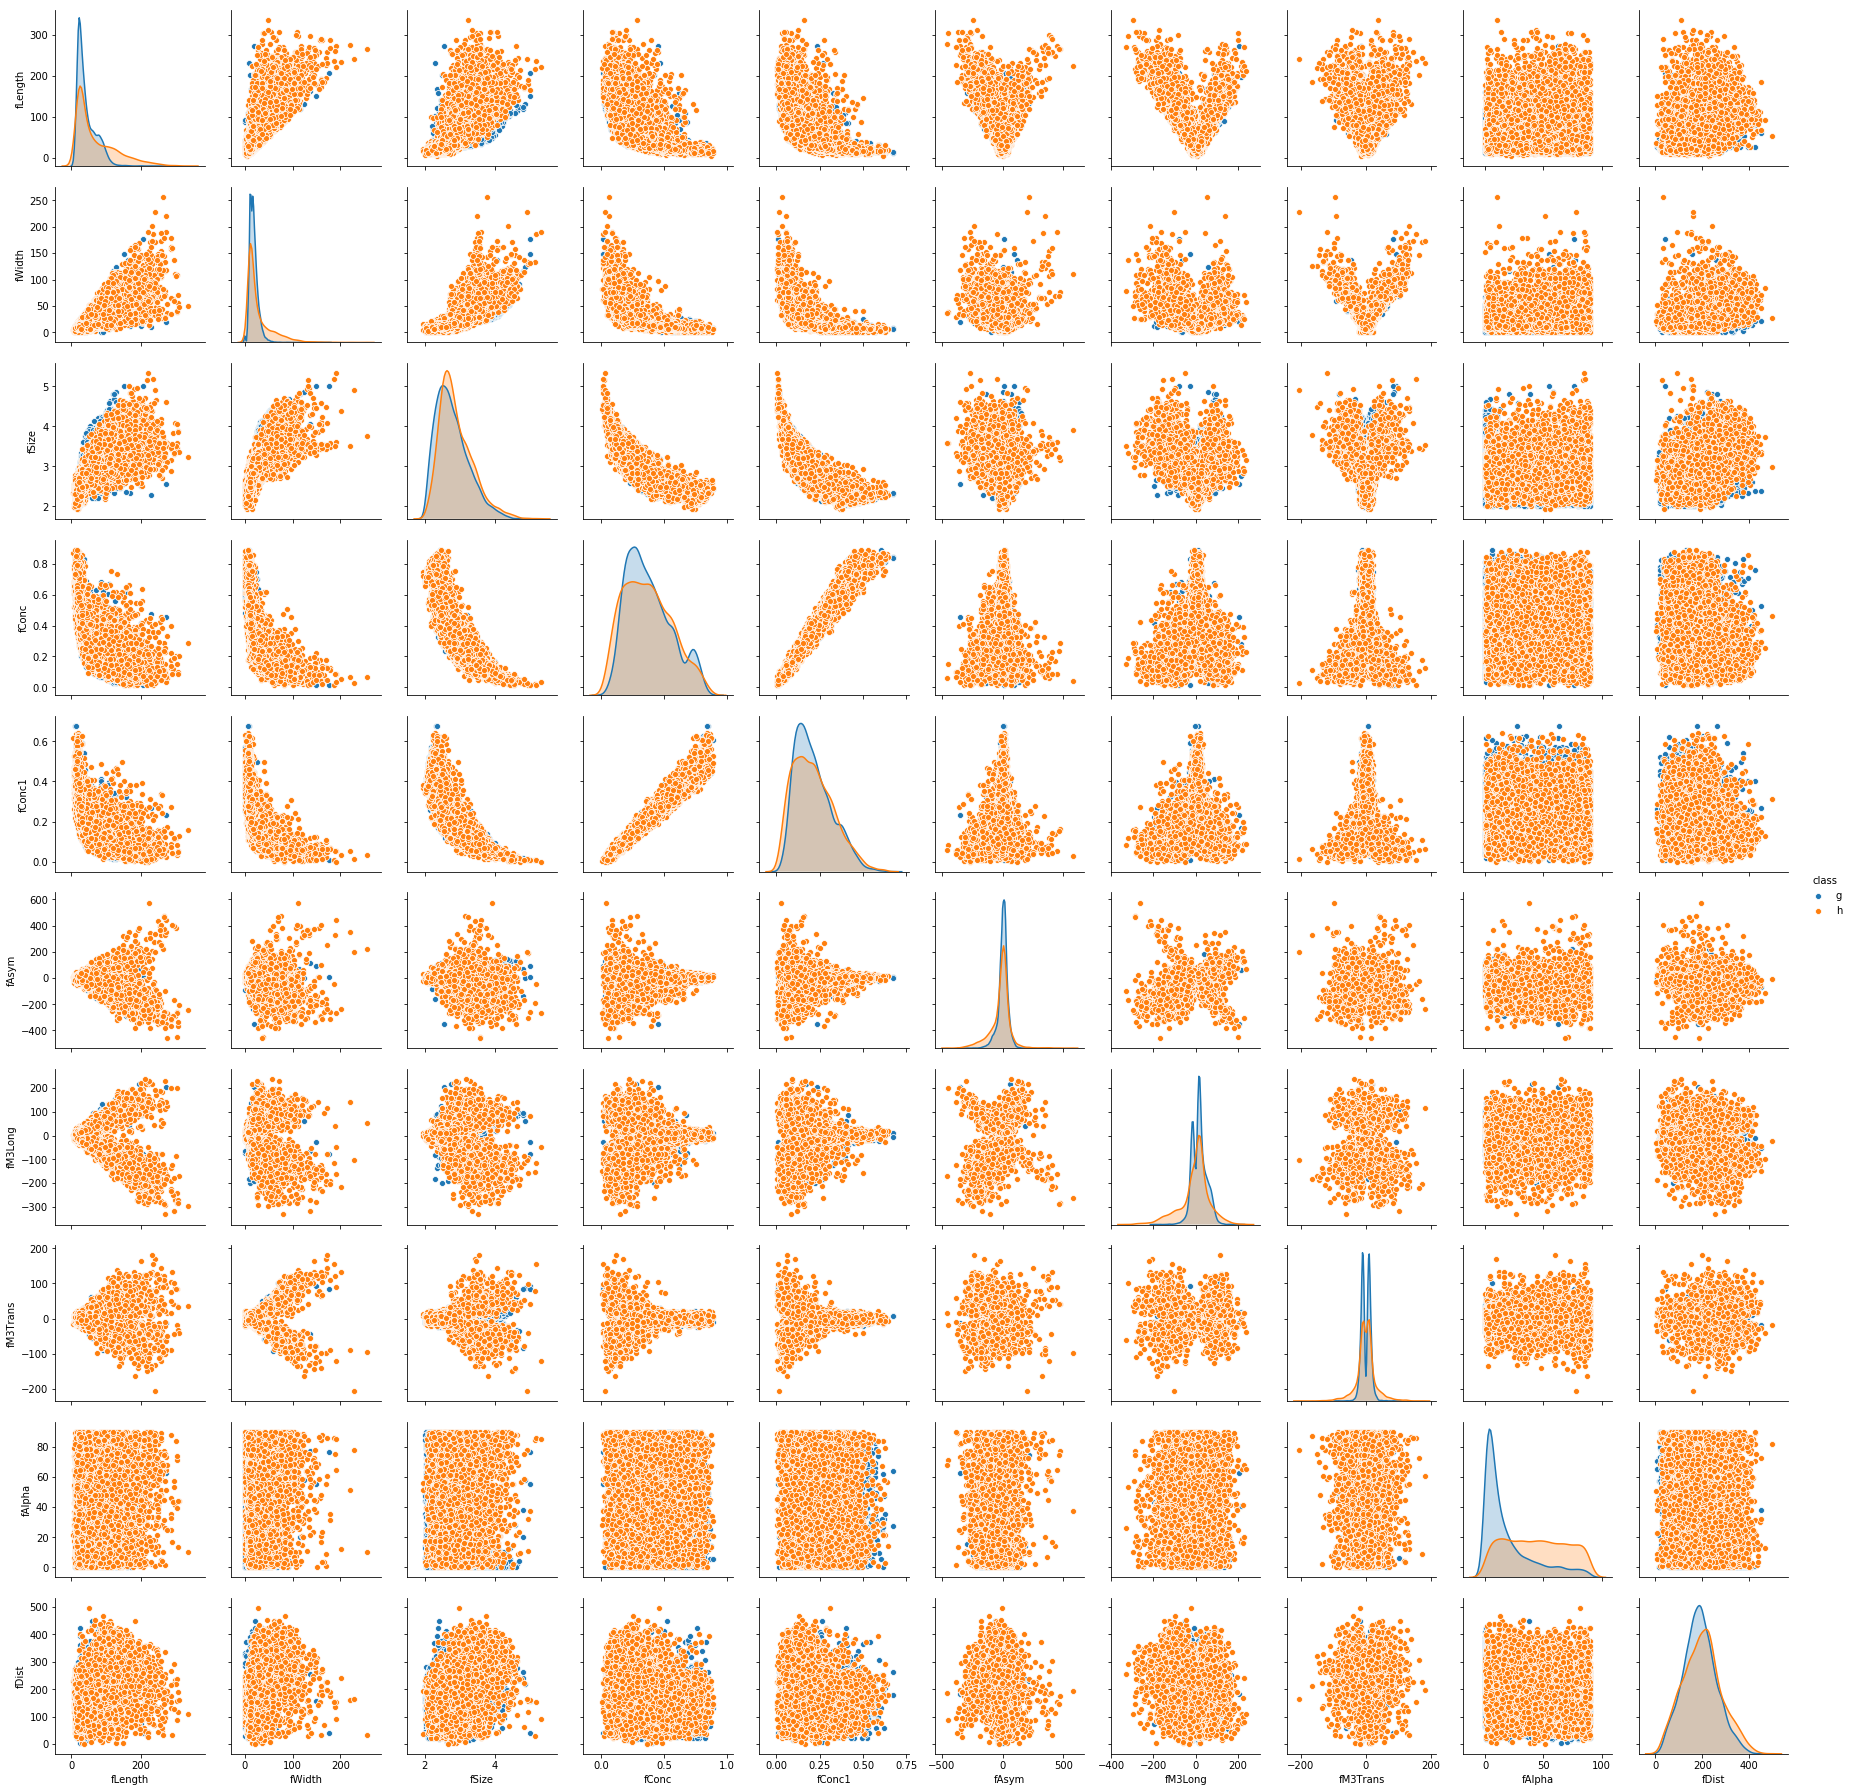

In [24]:
plt.figure(figsize=(17,17))
sns.pairplot(data=data,hue='class')
plt.show()

### Above the pair plot allowed us to visualize how each columns co-relate to each other.

### To get some more data and finalize our selections, we use heat map

### Plot rectangular data as a color-encoded matrix.

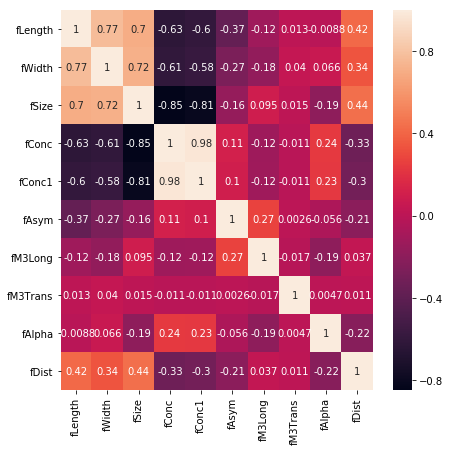

In [25]:
C=data.corr()
plt.figure(figsize=(7,7))
sns.heatmap(C,annot=True)
plt.show()

### Through the above heatmap, we can clearly say that dropping either fConc or fConc1in respect to each other and either of fSize or fConc, so we drop 'fConc1' and 'fSize'

In [10]:
data=data.drop(['fConc1','fSize'],axis=1)

## Before we go to make our classification model, we do some standardization to get some better results out of our model

### Standardize features by removing the mean and scaling to unit variance

#### Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [11]:
from sklearn.preprocessing import StandardScaler
Y=data['class']
Y=np.where(data['class']=='g',0,1)
data=data.drop(['class'],axis=1)
SS=StandardScaler()
data1=pd.DataFrame(SS.fit_transform(data),columns=[ 'fLength','fWidth' ,'fConc' ,'fAsym' ,'fM3Long','fM3Trans' ,'fAlpha' ,'fDist'])
data1

,fLength,fWidth,fConc,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,-0.577226,-0.336804,0.062759,0.541042,0.224818,-0.405842,0.476816,-1.497866
1,-0.510969,-0.570027,0.820383,0.516919,0.260364,-0.490094,-0.815418,0.153125
2,2.568278,6.205858,-1.875883,2.044992,-1.478536,-2.183030,1.889224,0.842635
3,-0.694768,-0.687259,1.282069,0.532771,-0.333515,-0.355359,-0.658804,-1.031463
4,0.516622,0.476384,-0.347506,-0.020200,0.353086,1.036620,-0.881039,2.176427
5,-0.038386,-0.056186,-0.756678,0.932494,0.640077,0.459251,-0.920690,0.592534
6,-0.118105,-0.262977,-0.697053,0.217969,0.540212,0.496333,-0.875523,0.338138
7,-0.624601,-0.459046,0.236712,0.573700,0.194327,-0.152636,-1.027996,0.579634
8,1.014607,1.326507,-1.654340,1.937129,1.460879,2.061502,-0.873147,0.728062
9,-0.153156,-0.380564,-0.233179,0.491289,0.653576,-0.332787,-0.757413,-1.225308


### Further, we go for pre-processing, going for Principal Component Analysis with which we do dimensional reduction.

#### Technically, Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.

In [12]:
from sklearn.decomposition import PCA
pc=PCA(n_components=6)
data2=pc.fit_transform(data1)

In [13]:
data2=pd.DataFrame(data2,columns=[x for x in range(len(data2[0]))])

In [14]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(data2,Y,test_size=0.2,random_state=0)

# Logistic Regression

### Here, we go for logistic regression.
#### We have only two classes(types of outputs) for our data, it would work for bi-variate classes, not really going for one vs. rest , which is really one vs one for our data.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
Lr=LogisticRegression()
Lr.fit(X_Train,Y_Train)
Pred=Lr.predict(X_Test)

c:\users\rohan\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
print(roc_auc_score(Pred,Y_Test))
lst = []
lst.append(roc_auc_score(Pred,Y_Test))
print(lst)

0.7750480793147282
[0.7750480793147282]


# Random Forest

### A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

### Also the number of estimators here will be 10

*Subjected to change in near future.*

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_Train,Y_Train)
Pred=rfc.predict(X_Test)
print(roc_auc_score(Pred,Y_Test))
lst.append(roc_auc_score(Pred,Y_Test))
print(lst)

c:\users\rohan\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8000149738327
[0.7750480793147282, 0.8000149738327]


# GradientBoostingClassifier

### Being an additive boosing model, we try and go for Gradient boosting classifier. working similar to Random forest by going for decision trees, it keeps on making trees better each time.

### Here, n-estimators are set to 100 by default which we will bw using.

*Not subjected to change when updated.*  - Hopefully - 

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_Train,Y_Train)
pred=gbc.predict(X_Test)
print(roc_auc_score(pred,Y_Test))
lst.append(roc_auc_score(pred,Y_Test))
print(lst)

0.8096572850212538
[0.7750480793147282, 0.8000149738327, 0.8096572850212538]


# Support Vector Machines

### The advantages of support vector machines are:

#### Effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples. Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient. Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.
#### The disadvantages of support vector machines include:
#### If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial. SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

In [21]:
from sklearn.svm import SVC
sv=SVC(kernel='rbf')
sv.fit(X_Train,Y_Train)
pred=sv.predict(X_Test)
print(roc_auc_score(pred,Y_Test))


c:\users\rohan\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8357093663911846


In [22]:
grid={'kernel':['linear','poly','rbf'],'gamma':[x/1000 for x in range(0,1000)]}

In [23]:
from sklearn.model_selection import RandomizedSearchCV
rcv=RandomizedSearchCV(estimator=sv,param_distributions=grid)
rcv.fit(X_Train,Y_Train)

c:\users\rohan\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'kernel': ['linear', 'poly', 'rbf'], 'gamma': [0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033,...5, 0.986, 0.987, 0.988, 0.989, 0.99, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [24]:
print(rcv.best_estimator_)
print(rcv.best_score_)
print(rcv.best_estimator_.kernel)
print(rcv.best_estimator_.gamma)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.314, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.8185462670872765
rbf
0.314


In [25]:
sv=SVC(kernel='rbf',gamma=0.964)
sv.fit(X_Train,Y_Train)
pred=sv.predict(X_Test)
print(roc_auc_score(pred,Y_Test))
lst.append(roc_auc_score(pred,Y_Test))

0.8266484742388358


In [26]:
print(lst)

[0.7750480793147282, 0.8000149738327, 0.8096572850212538, 0.8266484742388358]


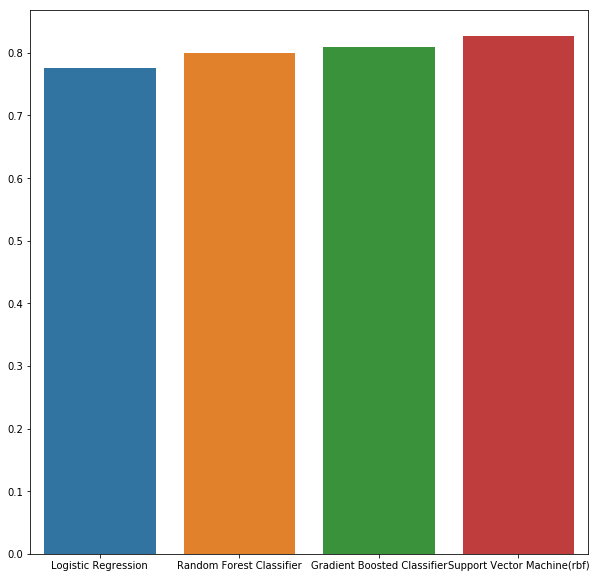

In [28]:
plt.figure(figsize=(10,10))
sns.barplot(y=lst,x=['Logistic Regression','Random Forest Classifier','Gradient Boosted Classifier','Support Vector Machine(rbf)'])
plt.show()

# With this barplot, it becomes clear to us that support vector machine is the best performing algorythm out of all these.